# Task 2: Credit Risk Prediction

**Objective:** Predict whether a loan applicant is likely to default on a loan

**Dataset:** Loan Prediction Datase

1.  Load and Understand the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/task/Loan_default.csv')
print(df.isnull().sum())


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [5]:
print(df.columns.tolist())

['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']


In [6]:
df.columns = df.columns.str.strip()


In [8]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


1. Import Visualization **Libraries**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Make plots look nicer
sns.set(style="whitegrid")

 2. **Visualize Loan Amount Distribution**

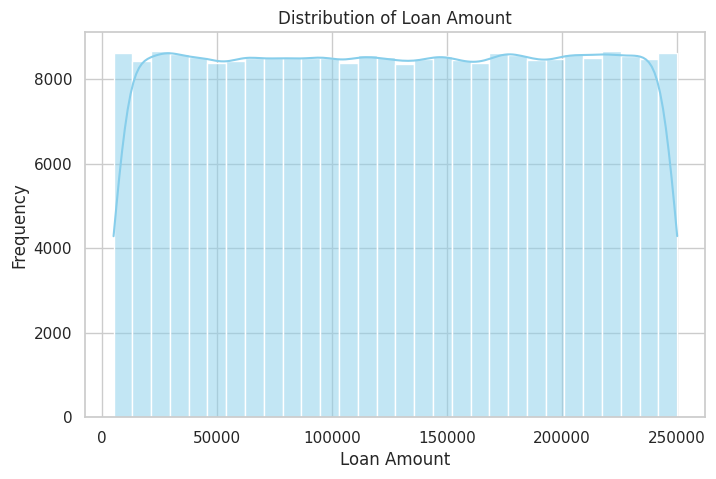

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

 3. **Compare Education Level vs Loan Amount**

/tmp/ipython-input-12-3082612909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Set2')


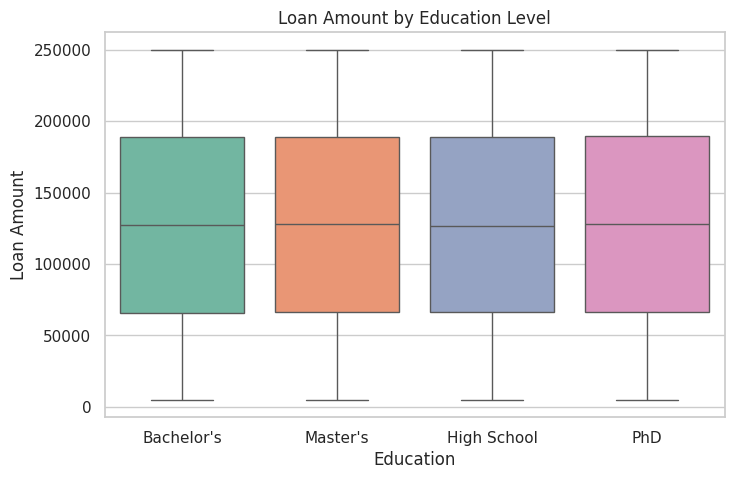

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Set2')
plt.title('Loan Amount by Education Level')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

 4. **Income vs Loan Amount Scatter Plot**

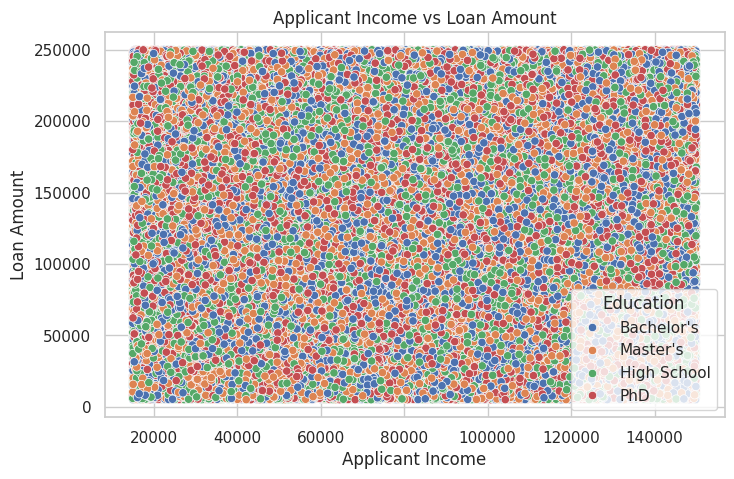

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='LoanAmount', hue='Education', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

**Prepare the data**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Make sure all strings are lowercase and stripped
df.columns = df.columns.str.strip().str.lower()

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Define features and target
X = df.drop('default', axis=1)  # Replace with your target column
y = df['default']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Train Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8852946935578617
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.56      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070



2. Train Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8011944390052869
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     45170
           1       0.20      0.24      0.22      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.56      0.55     51070
weighted avg       0.82      0.80      0.81     51070



**Import the tools**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

1. Evaluate Logistic Regression

Logistic Regression Accuracy: 0.89


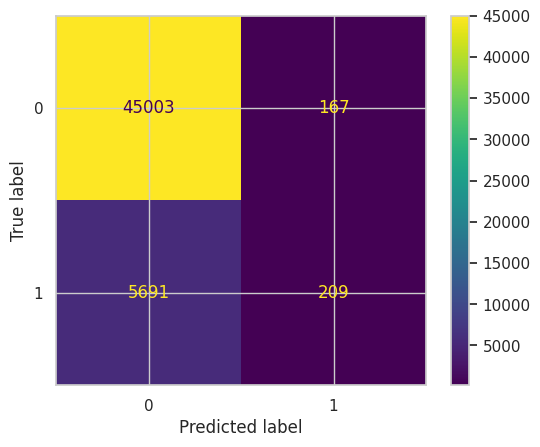

In [21]:
# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot()

2. Evaluate Decision Tree

Decision Tree Accuracy: 0.80


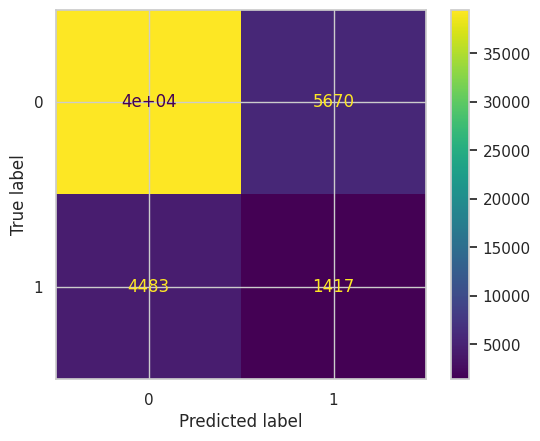

In [22]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp_dt.plot()